# 2 不同分布下的贝叶斯
## 2.1 高斯朴素贝叶斯GaussianNB
### 2.1.1 认识高斯朴素贝叶斯
`class sklearn.naive_bayes.GaussianNB (priors=None, var_smoothing=1e-09)`
**高斯朴素贝叶斯，通过假设$P(x_i|Y)$是服从高斯分布（也就是正态分布），来估计每个特征下在每个类别上的条件概率**。对于每个特征下的取值，高斯朴素贝叶斯有如下公式：
$$P(x_i|Y) = \frac{1}{\sqrt{2\pi\sigma^2_{y}}}exp(-\frac{(x_i-\mu_{y})^2}{2\sigma^2_{y}})$$
对于任意一个Y的取值，贝叶斯都以求解最大化的$P(x_i|Y)$为目标，这样才能够比较在不同标签下的样本究竟更靠近哪一个取值。以最大化$P(x_i|Y)$为目标，高斯朴素贝叶斯会为我们求解公式中的参数$\mu_y$和$\sigma_y$。求解出参数后，带入一个$x_i$的值，就能够得到一个$P(x_i|Y)$的概率取值。
- `priors`：先验概率，如果不输入，则根据训练数据得到先验概率
- `var_smoothing`：浮点数，可不填（默认值=1e-9）在估计方差时，为了追求估计的稳定性，将所有特征的方差中最大的方差以某个比例添加到估计的方差中。这个比例，由var_smoothing参数控制。

但在实例化的时候，我们不需要对高斯朴素贝叶斯类输入任何的参数，调用的接口也是sklearn中比较标准的一些搭配，可以说是一个非常轻量级的类，操作非常容易。但过于简单也意味着贝叶斯没有太多的参数可以调整，因此**贝叶斯算法的成长空间并不是太大，如果贝叶斯算法的效果不是太理想，一般都会考虑换模型**。无论如何，先来进行一次预测试试看吧：

- **导入需要的库和数据**


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420)

- **建模，探索建模结果**

In [41]:
gnb = GaussianNB().fit(X_train, y_train)

# 查看预测准确率
acc_score = gnb.score(X_test, y_test)
print("预测得分为：", acc_score)
# 查看预测结果
y_pred = gnb.predict(X_test)
print("预测结果为：", y_pred[:20])
# 查看预测的概率结果
prob = gnb.predict_proba(X_test)  # 每一列对应一个标签的概率，每一行的概率加和都为1
print('预测各类别下的概率：', prob.shape)

预测得分为： 0.8511111111111112
预测结果为： [6 1 3 0 4 5 0 8 3 8 6 8 7 8 8 8 5 3 5 6]
预测各类别下的概率： (450, 10)


- **使用混淆矩阵来查看贝叶斯的分类结果**

In [42]:
from sklearn.metrics import confusion_matrix as CM

print(CM(y_test, y_pred))  # 对角线上的数字表示预测正确的数量，非对角线上的数字表示预测错误的数量

# 注意，ROC曲线是不能用于多分类的。多分类状况下最佳的模型评估指标是混淆矩阵和整体的准确率。

[[40  0  0  0  0  0  0  1  0  0]
 [ 0 40  2  0  0  0  0  0  3  2]
 [ 0  3 27  1  0  0  1  0 14  0]
 [ 0  0  0 31  0  1  0  2  3  0]
 [ 0  0  1  0 33  0  1  4  0  0]
 [ 0  0  0  1  0 46  1  1  0  0]
 [ 0  0  1  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  6  0  1  0  0  0  2 46  0]
 [ 0  1  0  2  2  0  0  3  7 34]]


### 2.1.2 探索贝叶斯：高斯朴素贝叶斯擅长的数据集
高斯朴素贝叶斯擅长什么样的数据集呢？我们使用常用的三种数据分布：月亮型，环形数据以及二分型数据来观察一下。

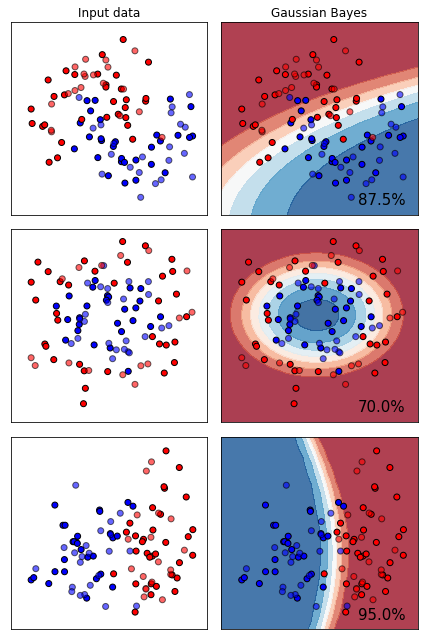

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

h = .02
names = ["Multinomial", "Gaussian", "Bernoulli", "Complement"]
classifiers = [MultinomialNB(), GaussianNB(), BernoulliNB(), ComplementNB()]
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)  # 加点噪声
linearly_separable = (X, y)  # 合并成元组
datasets = [make_moons(noise=0.3, random_state=0), make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(6, 9))
i = 1

for ds_index, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)  # 标准化
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    array1, array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 2, i)
    if ds_index == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())  # 去掉坐标轴
    ax.set_yticks(())

    i += 1
    ax = plt.subplot(len(datasets), 2, i)

    clf = GaussianNB().fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    Z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:, 1]
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())

    if ds_index == 0:
        ax.set_title("Gaussian Bayes")

    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score * 100)),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

从图上来看，高斯贝叶斯属于比较特殊的一类分类器，其分类效果在二分数据和月亮型数据上表现优秀，但是环形数据不太擅长。许多线性模型比如逻辑回归，线性SVM等等，在线性数据集上会绘制直线决策边界，因此难以对月亮型和环形数据进行区分，但高斯朴素贝叶斯的决策边界是曲线，可以是环形也可以是弧线，所以尽管贝叶斯本身更加擅长线性可分的二分数据，但朴素贝叶斯在环形数据和月亮型数据上也可以有远远胜过其他线性模型的表现。
### 2.1.3 探索贝叶斯：高斯朴素贝叶斯的拟合效果与运算速度
我们已经了解高斯朴素贝叶斯属于分类效果不算顶尖的模型，但我们依然好奇，这个算法在拟合的时候还有哪些特性呢？比如说我们了解，决策树是天生过拟合的模型，而支持向量机是不调参数的情况下就非常接近极限的模型。我们希望**通过绘制高斯朴素贝叶斯的学习曲线与分类树，随机森林和支持向量机的学习曲线的对比，来探索高斯朴素贝叶斯算法在拟合上的性质**。过去绘制学习曲线都是以算法类的某个参数的取值为横坐标，这里使用sklearn中自带的绘制学习曲线的类learning_curve，在这个类中执行交叉验证并从中获得不同样本量下的训练和测试的准确度。、

1. **首先导入需要的模块和库**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve  # 画学习曲线的模块
from sklearn.model_selection import ShuffleSplit  # 设定交叉验证模式的模块
from time import time
import datetime

2. **定义绘制学习曲线的函数**

In [30]:
# 输入分类器、数据、标题、横坐标、纵坐标、交叉验证、线程，一次性画出多个分类器的对比
def plot_learning_curve(estimator, title, X, y, ax,
                        ylim=None,  #设置纵坐标的取值范围
                        cv=None,  #交叉验证
                        n_jobs=None  #设定索要使用的线程
                        ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs)
    # train_sizes:(5,)返回训练样本数，train_scores:(5,50)返回训练集上的分数，test_scores:(5,50)返回测试集上的分数
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()  #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Test score")
    ax.legend(loc="best")
    return ax

3. **导入数据，定义循环**

In [31]:
digits = load_digits()
X, y = digits.data, digits.target

title = ["Naive Bayes", "DecisionTree", "SVM, RBF kernel", "RandomForest", "Logistic"]
model = [GaussianNB(), DTC(), SVC(gamma=0.001), RFC(n_estimators=50), LR(C=.1, solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=.2, random_state=0)

4. **进入循环，绘制学习曲线**

Naive Bayes:00:01:365892
DecisionTree:00:01:478388
SVM, RBF kernel:00:08:597016
RandomForest:00:07:524288
Logistic:00:16:483629


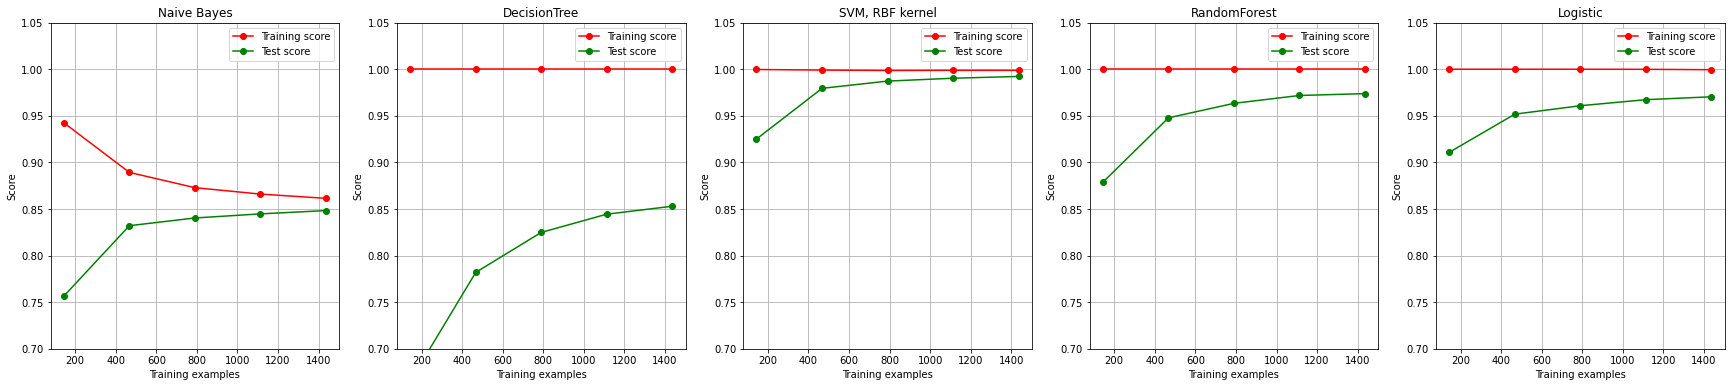

In [32]:
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
for ind, title_, estimator in zip(range(len(title)), title, model):
    times = time()
    plot_learning_curve(estimator, title_, X, y, ax=axes[ind], ylim=[0.7, 1.05], n_jobs=4, cv=cv)
    print("{}:{}".format(title_, datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S:%f")))
plt.show()

可以看出：
**在运算时间上**，朴素贝叶斯是十分有优势的；

**在训练集上的拟合上**，手写数字数据集是一个较为简单的数据集，决策树，随机森林，SVC和逻辑回归都成功拟合了100%的准确率，但贝叶斯的最高训练准确率都没有超过95%，这也印证了朴素贝叶斯的分类效果其实不如其他分类器，贝叶斯天生学习能力比较弱。并且注意到，随着训练样本量的逐渐增大，其他模型的训练拟合都保持在100%的水平，但贝叶斯的训练准确率却逐渐下降，这证明样本量越大，贝叶斯需要学习的东西越多，对训练集的拟合程度也越来越差。反而比较少量的样本可以让贝叶斯有较高的训练准确率；

**在过拟合问题上**，首先一眼看到，所有模型在样本量很少的时候都是出于过拟合状态的（训练集上表现好，测试集上表现糟糕），但随着样本的逐渐增多，过拟合问题都逐渐消失了，不过每个模型的处理手段不同。比较强大的分类器们，比如SVM，随机森林和逻辑回归，是依靠快速升高模型在测试集上的表现来减轻过拟合问题。相对的，决策树虽然也是通过提高模型在测试集上的表现来减轻过拟合，但随着训练样本的增加，模型在测试集上的表现上升却非常缓慢。朴素贝叶斯独树一帜，是依赖训练集上的准确率下降，测试集上的准确率上升来逐渐解决过拟合问题。

**在测试集上的拟合结果**，即泛化误差的大小。随着训练样本数量的上升，所有模型的测试表现都上升了，但贝叶斯和决策树在测试集上的表现远远不如SVM，随机森林和逻辑回归。SVM在训练数据量增大到1500个样本左右的时候，测试集上的表现已经非常接近100%，而随机森林和逻辑回归的表现也在95%以上，而决策树和朴素贝叶斯还徘徊在85%左右。但这两个模型所面临的情况十分不同：决策树虽然测试结果不高，但是却依然具有潜力，因为它的过拟合现象非常严重，我们可以通过减枝来让决策树的测试结果逼近训练结果。然而贝叶斯的过拟合现象在训练样本达到1500左右的时候已经几乎不存在了，训练集上的分数和测试集上的分数非常接近，只有在非常少的时候测试集上的分数才能够比训练集上的结果更高，所以我们基本可以判断，85%左右就是贝叶斯在这个数据集上的极限了。可以预测到，**如果我们进行调参，那决策树最后应该可以达到90%左右的预测准确率，但贝叶斯却几乎没有潜力了**。

在这个对比之下，我们可以看出：贝叶斯是速度很快，但分类效果一般，并且初次训练之后的结果就很接近算法极限的算法，几乎没有调参的余地。也就是说，==如果追求对概率的预测，并且希望越准确越好，那么应该先选择逻辑回归==。如果数据十分复杂，或者是稀疏矩阵，那我们坚定地使用贝叶斯。==如果分类的目标不是要追求对概率的预测，那完全可以先试试看高斯朴素贝叶斯的效果（反正它运算很快速，还不需要太多的样本），如果效果很不错，我们就很幸运地得到了一个表现优秀又快速的模型==。如果我们没有得到比较好的结果，那我们完全可以选择再更换成更加复杂的模型。
## 2.2 概率类模型的评估指标
混淆矩阵和精确性可以帮助我们了解贝叶斯的分类结果。然而，我们选择贝叶斯进行分类，大多数时候都不是为了单单追求效果，而是希望看到**预测的相关概率**。这种概率给出预测的可信度，所以对于概率类模型，我们希望能够由其他的模型评估指标来帮助我们判断，模型在“概率预测”这项工作上，完成得如何。接下来，我们就来看看概率模型独有的评估指标。
### 2.2.1 布里尔分数Brier Score
概率预测的准确程度被称为“校准程度”，是衡量算法预测出的概率和真实结果的差异的一种方式。一种比较常用的指标叫做布里尔分数，它被计算为是概率预测相对于测试样本的均方误差，表示为：
$$ Brier Score=\frac{1}{N}\sum_{t=1}^{n}(p_{i}-o_{i})^{2} $$
其中N是样本数量，$p_i$为朴素贝叶斯预测出的概率，$o_i$是样本所对应的真实结果，只能取到0或者1，如果事件发生则为1，如果不发生则为0。这个指标衡量了我们的概率距离真实标签结果的差异，其实看起来非常像是均方误差。**布里尔分数的范围是从0到1，分数越高则预测结果越差劲，校准程度越差，因此布里尔分数越接近0越好**。由于它的本质也是在衡量一种损失，所以在sklearn当中，布里尔得分被命名为brier_score_loss。我们可以从模块metrics中导入这个分数来衡量我们的模型评估结果：



In [52]:
from sklearn.metrics import brier_score_loss  # 注意：只对二分类有效

# 第一个参数是真实标签，第二个参数是预测的概率
# 在二分类情况下，接口predict_proba会返回两列，但SVC的接口decision_function却只会返回一列
# 要随时注意，使用了怎样的概率分类器，以辨别查找置信度的接口，以及这些接口的结构
brier_score_loss(y_test, prob[:, 1], pos_label=1)
# pos_label与prob中的索引一致，就可以查看这个类别下的布里尔分数是多少

布里尔分数可以用于任何可以使用predict_proba接口调用概率的模型，我们来探索一下在手写数字数据集上，逻辑回归，SVC和我们的高斯朴素贝叶斯的效果如何：

In [53]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

logi = LR(C=1., solver='lbfgs', max_iter=3000, multi_class='auto').fit(X_train, y_train)
svc = SVC(kernel="linear", gamma=1).fit(X_train, y_train)

print(brier_score_loss(y_test, logi.predict_proba(X_test)[:, 1], pos_label=1))

# 由于SVC的置信度并不是概率，为了可比性，我们需要将SVC置信度“距离”归一化，压缩到0到1之间
svc_prob = (svc.decision_function(X_test) - svc.decision_function(X_test).min()) / (
        svc.decision_function(X_test).max() - svc.decision_function(X_test).min())

print(brier_score_loss(y_test, svc_prob[:, 1], pos_label=1))

ValueError: Only binary classification is supported. The type of the target is multiclass.

如果将每个分类器每个标签类别下的布里尔分数可视化，则执行以下代码：

In [ ]:
import pandas as pd

name = ["Bayes", "Logistic", "SVC"]
color = ["red", "black", "orange"]
df = pd.DataFrame(index=range(10), columns=name)
for i in range(10):
    df.loc[i, name[0]] = brier_score_loss(y_test, prob[:, i], pos_label=i)
    df.loc[i, name[1]] = brier_score_loss(y_test, logi.predict_proba(X_test)[:, i], pos_label=i)
    df.loc[i, name[2]] = brier_score_loss(y_test, svc_prob[:, i], pos_label=i)
for i in range(df.shape[1]):
    plt.plot(range(10), df.iloc[:, i], c=color[i])
plt.legend()
plt.show()

一般情况下，逻辑回归的布里尔分数有着压倒性优势，SVC的效果明显弱于贝叶斯和逻辑回归（因为SVC是强行利用sigmoid函数来压缩概率，因此SVC产出的概率结果并不那么可靠）。贝叶斯位于逻辑回归和SVC之间，效果也不错，但比起逻辑回归，还是不够精确和稳定。
### 2.2.2 对数损失Log Loss
另一种常用的概率损失衡量是对数损失（log_loss），又叫做对数似然，逻辑损失或者交叉熵损失，它是多元逻辑回归以及一些拓展算法，比如神经网络中使用的损失函数。它被定义为：对于一个给定的概率分类器，在预测概率为条件的情况下，真实概率发生的可能性的负对数。**由于是损失，因此对数似然函数的取值越小，则证明概率估计越准确，模型越理想**。值得注意得是，对数损失只能用于评估分类型模型。

对于一个样本，如果样本的真实标签$y_{true}$在{0,1}中取值，并且这个样本在类别1下的概率估计为$y_{pred}$，则这个样本所对应的对数损失是：
$$ -logP(y_{true}|y_{pred})=-(y_{true}*log(y_{pred})+(1-y_{true})*log(1-y_{pred})) $$
和逻辑回归的损失函数一模一样：
$$ J(\theta)=-\sum_{i=1}^m(y_{i}*log(y_{\theta}(x_i))+(1-y_{i})*log(1-y_{\theta}(x_i))) $$

只不过在逻辑回归的损失函数中，我们的真实标签是由$y_i$表示，预测值（概率估计）是由$y_{\theta}(x_i)$来表示，仅仅是表示方式的不同。注意，这里的$log$是以$e$为底的自然对数。在sklearn中，我们可以从metrics模块中导入我们的对数似然函数：

In [58]:
from sklearn.metrics import log_loss

logi = LR(C=1., solver='lbfgs', max_iter=3000, multi_class='auto').fit(X_train, y_train)
svc = SVC(kernel="linear", gamma=1).fit(X_train, y_train)
svc_prob = (svc.decision_function(X_test) - svc.decision_function(X_test).min()) / (
        svc.decision_function(X_test).max() - svc.decision_function(X_test).min())

log_loss(y_test, prob), log_loss(y_test, logi.predict_proba(X_test)), log_loss(y_test, svc_prob)

(2.364795042985354, 0.14190192654122152, 1.6078544571320117)

**什么时候使用对数似然，什么时候使用布里尔分数？**
#### 截图
回到我们的贝叶斯来看，如果贝叶斯的模型效果不如其他模型，而我们又不想更换模型，那怎么办呢？如果以精确度为指标来调整参数，贝叶斯估计是无法拯救了——不同于SVC和逻辑回归，贝叶斯的原理简单，根本没有什么可用的参数。但是产出概率的算法有自己的调节方式，就是调节概率的校准程度。校准程度越高，模型对概率的预测越准确，算法在做判断时就越有自信，模型就会更稳定。如果我们追求模型在概率预测上必须尽量贴近真实概率，那我们就可以使用可靠性曲线来调节概率的校准程度。
### 2.2.3 可靠性曲线Reliability Curve
可靠性曲线（reliability curve），又叫做概率校准曲线（probability calibration curve），可靠性图（reliability diagrams），这是一条**以预测概率为横坐标，真实标签概率为纵坐标的曲线**。我们希望预测概率和真实值越接近越好，最好两者相等，因此**一个模型的概率校准曲线越靠近对角线越好**。校准曲线因此也是我们的模型评估指标之一。和布里尔分数相似，概率校准曲线是对于标签的某一类来说的，因此一类标签就会有一条曲线，或者我们可以使用一个多类标签下的平均来表示一整个模型的概率校准曲线。但通常来说，**曲线用于二分类的情况最多**。

但如果我们能够找到真实的概率，那我们何必还用算法来估计概率呢，直接去获取真实的概率不就好了么？所以真实概率在现实中是不可获得的。但是，我们可以获得类概率的指标来帮助我们进行校准。**一个简单的做法是，将数据进行分箱，然后规定每个箱子中真实的少数类所占的比例为这个箱上的真实概率true proba，这个箱子中预测概率的均值为这个箱子的预测概率pred proba，然后以true proba为纵坐标，pred proba为横坐标，来绘制我们的可靠性曲线**。
#### 截图
可见，分箱之后曲线明显变得单调且平滑。这种分箱操作本质相当于是一种平滑，在sklearn中，这样的做法可以通过绘制可靠性曲线的类**calibration_curve**来实现。和ROC曲线类似，类calibration_curve可以帮助我们获取我们的横纵坐标，然后使用matplotlib来绘制图像。该类有如下参数：
#### 截图
使用可靠性曲线的类在贝叶斯上绘制一条校准曲线：

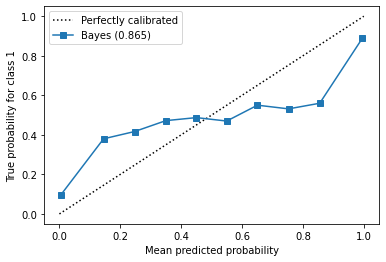

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve

# 生成数据集
X, y = mc(n_samples=100000, n_features=20, n_classes=2, n_informative=2, n_redundant=10, random_state=42)

# 样本量足够大，因此可以直接使用1%的样本作为训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

gbn = GaussianNB().fit(X_train, y_train)
y_pred = gbn.predict(X_test)
prob_pos = gbn.predict_proba(X_test)[:, 1]  # 预测为1的概率

# 从类calibration_curve中获取横纵坐标
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# 绘制图像
plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")  # 绘制对角线,k:表示黑色虚线
ax1.plot(prob_pred, prob_true, "s-", label=f'Bayes ({round(gbn.score(X_test, y_test), 3)})')  # 绘制可靠性曲线
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predicted probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

不同的n_bins取值下曲线如何改变？

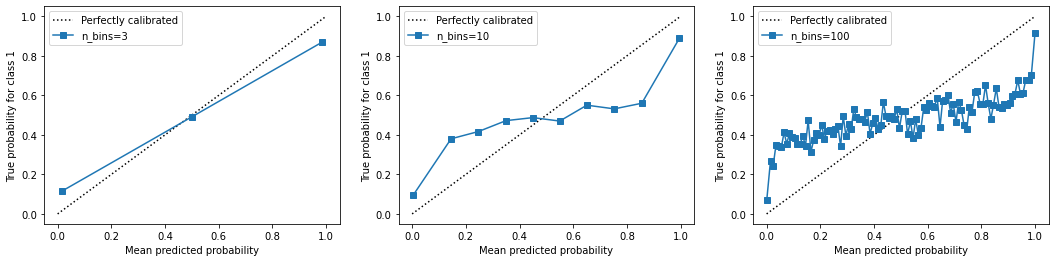

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for ind, i in enumerate([3, 10, 100]):
    prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=i)
    axes[ind].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    axes[ind].plot(prob_pred, prob_true, "s-", label=f'n_bins={i}')
    axes[ind].set_ylabel("True probability for class 1")
    axes[ind].set_xlabel("Mean predicted probability")
    axes[ind].set_ylim([-0.05, 1.05])
    axes[ind].legend()
plt.show()

很明显可以看出，n_bins越大，箱子越多，概率校准曲线就越精确，但是太过精确的曲线不够平滑，无法和我们希望的完美概率密度曲线相比较。n_bins越小，箱子越少，概率校准曲线就越粗糙，虽然靠近完美概率密度曲线，但是无法真实地展现模型概率预测结果。因此我们需要取一个既不是太大，也不是太小的箱子个数，让概率校准曲线既不是太精确，也不是太粗糙，而是一条相对平滑，又可以反应出模型对概率预测的趋势的曲线。通常来说，建议先试试看箱子数等于10的情况。箱子的数目越大，所需要的样本量也越多，否则曲线就会太过精确。

建立更多模型，绘制更多的校准曲线:

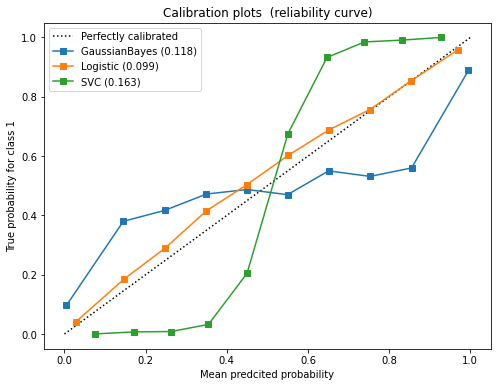

In [101]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

name = ["GaussianBayes", "Logistic", "SVC"]
gnb = GaussianNB()
logi = LR(C=1., solver='lbfgs', max_iter=3000, multi_class="auto")
svc = SVC(kernel="linear", gamma=1)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for clf, name_ in zip([gnb, logi, svc], name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    #返回布里尔分数
    clf_score = brier_score_loss(y_test, prob_pos, pos_label=1)
    trueproba, predproba = calibration_curve(y_test, prob_pos, n_bins=10)
    ax1.plot(predproba, trueproba, "s-", label="%s (%1.3f)" % (name_, clf_score))

ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
ax1.set_title('Calibration plots  (reliability curve)')
plt.show()

从图像的结果来看，我们可以明显看出，逻辑回归的概率估计是最接近完美的概率校准曲线，所以逻辑回归的效果最完美。相对的，高斯朴素贝叶斯和支持向量机分类器的结果都比较糟糕。支持向量机呈现类似于sigmoid函数的形状，而高斯朴素贝叶斯呈现和Sigmoid函数相反的形状。

**对于贝叶斯，如果概率校准曲线呈现sigmoid函数的镜像的情况，则说明数据集中的特征不是相互条件独立的**。贝叶斯原理中的”朴素“原则：特征相互条件独立原则被违反了（这其实是我们自己的设定，我们设定了10个冗余特征，这些特征就是噪音，他们之间不可能完全独立），因此贝叶斯的表现不够好。

而支持向量机的概率校准曲线效果其实是典型的置信度不足的分类器(under-confident classifier)的表现：**大量的样本点集中在决策边界的附近，因此许多样本点的置信度靠近0.5左右，即便决策边界能够将样本点判断正确，模型本身对这个结果也不是非常确信的**。相对的，离决策边界很远的点的置信度就会很高，因为它很大可能性上不会被判断错误。支持向量机在面对混合度较高的数据的时候，有着天生的置信度不足的缺点。

### 2.2.4 预测概率的直方图
我们可以通过绘制直方图来查看模型的预测概率的分布。**直方图是以样本的预测概率分箱后的结果为横坐标，每个箱中的样本数量为纵坐标的一个图像**。注意，这里的分箱和在可靠性曲线中的分箱不同，这里的分箱是将预测概率均匀分为一个个的区间，与之前可靠性曲线中为了平滑的分箱完全是两码事。我们来绘制一下我们的直方图：

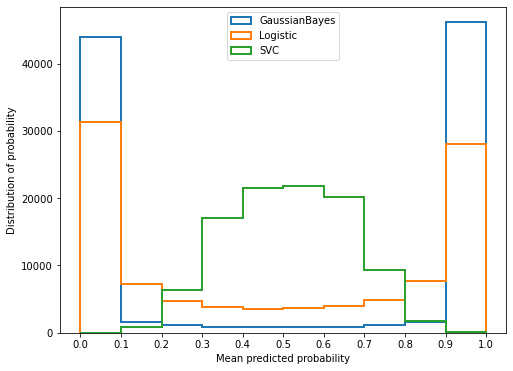

In [102]:
fig, ax2 = plt.subplots(figsize=(8, 6))

for clf, name_ in zip([gnb, logi, svc], name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    ax2.hist(prob_pos  #预测概率
             , bins=10
             , label=name_
             , histtype="step"  #设置直方图为透明，防止直方图之间的覆盖
             , lw=2  #设置直方图每个柱子描边的粗细
             )

ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05, 1.05])
ax2.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax2.legend(loc=9)
plt.show()

可以看到，高斯贝叶斯的概率分布是两边非常高，中间非常低，几乎90%以上的样本都在0和1的附近，可以说是置信度最高的算法，但是贝叶斯的布里尔分数却不如逻辑回归，这证明贝叶斯中在0和1附近的样本中有一部分是被分错的。支持向量贝叶斯完全相反，明显是中间高，两边低，类似于正态分布的状况，证明了我们刚才所说的，大部分样本都在决策边界附近，置信度都徘徊在0.5左右的情况。而逻辑回归位于高斯朴素贝叶斯和支持向量机的中间，即没有太多的样本过度靠近0和1，也没有形成像支持向量机那样的正态分布。一个比较健康的正样本的概率分布，就是逻辑回归的直方图显示出来的样子。

我们已经得知了朴素贝叶斯和SVC预测概率的效果各方面都不如逻辑回归，那在这种情况下，我们如何来帮助模型或者算法，让他们对自己的预测更有信心，置信度更高呢？我们可以使用**等近似回归来矫正概率算法**。

### 2.2.5 校准可靠性曲线
等近似回归有两种回归可以使用，一种是基于Platt的Sigmoid模型的参数校准方法，一种是基于等渗回归（isotonic calibration）的非参数的校准方法。概率校准应该发生在测试集上，必须是模型未曾见过的数据。如果希望深入研究利用回归校准概率的细节，可以查看sklearn中的如下案例。这是一个基于鸢尾花数据集的，三分类数据上的概率校准过程，感兴趣可以仔细研究：[Probability Calibration for 3-class classification](https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_multiclass.html#sphx-glr-auto-examples-calibration-plot-calibration-multiclass-py)

在这里主要展示如何使用sklearn中的概率校正类CalibratedClassifierCV来对二分类情况下的数据集进行概率校正。
`class sklearn.calibration.CalibratedClassifierCV (base_estimator=None, method=’sigmoid’, cv=’warn’)`
这是一个带交叉验证的概率校准类，它使用交叉验证生成器，对交叉验证中的每一份数据，它都在训练样本上进行模型参数估计，在测试样本上进行概率校准，然后返回最佳的一组参数估计和校准结果。每一份数据的预测概率会被求解平均。注意，类CalibratedClassifierCV没有接口decision_function，要查看这个类下校准过后的模型生成的概率，必须调用predict_proba接口。
#### 截图

依然来使用之前建立的数据集。

1. **包装函数**

首先，将之前绘制可靠性曲线和直方图的代码包装成函数。考虑函数的参数为：模型，模型的名字，数据，和需要分箱的个数。在这里将直方图和可靠性曲线打包在同一个函数中，让他们并排显示。

In [7]:
def plot_calib(models, name, Xtrain, Xtest, Ytrain, Ytest, n_bins=10):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    for clf, name_ in zip(models, name):
        clf.fit(Xtrain, Ytrain)
        y_pred = clf.predict(Xtest)
        # hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        #返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=1)
        trueproba, predproba = calibration_curve(Ytest, prob_pos, n_bins=n_bins)
        ax1.plot(predproba, trueproba, "s-", label="%s (%1.3f)" % (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_, histtype="step", lw=2)

    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probablity")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

2. **设实例化模型，设定模型的名字**

In [8]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification as mc
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve

X, y = mc(n_samples=100000, n_features=20, n_classes=2, n_informative=2, n_redundant=10, random_state=42)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.99, random_state=42)

name = ["GaussianBayes", "Logistic", "Bayes+isotonic", "Bayes+sigmoid"]
gnb = GaussianNB()
models = [gnb,
          LogisticRegression(C=1., solver='lbfgs', max_iter=3000, multi_class='auto'),
          CalibratedClassifierCV(gnb, cv=2, method='isotonic'),
          CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

3. **基于函数进行绘图**

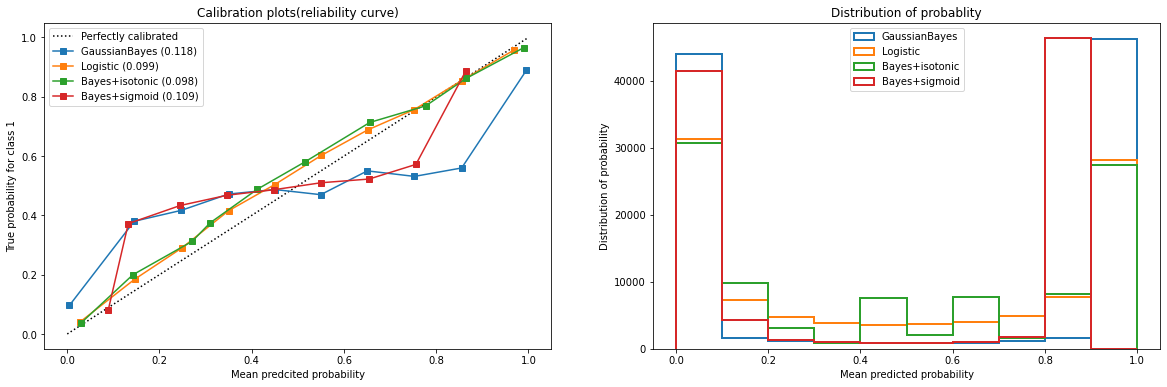

In [9]:
plot_calib(models, name, Xtrain, Xtest, Ytrain, Ytest)

从校正朴素贝叶斯的结果来看，Isotonic等渗校正大大改善了曲线的形状，几乎让贝叶斯的效果与逻辑回归持平，并且布里尔分数也下降到了0.098，比逻辑回归还低一个点。Sigmoid校准的方式也对曲线进行了稍稍的改善，不过效果不明显。从直方图来看，Isotonic校正让高斯朴素贝叶斯的效果接近逻辑回归，而Sigmoid校正后的结果依然和原本的高斯朴素贝叶斯更相近。可见，**当数据的特征之间不是相互条件独立的时候，使用Isotonic方式来校准概率曲线，可以得到不错的结果，让模型在预测上更加可靠**。

4. **基于校准结果查看精确性的变化**

In [10]:
gnb = GaussianNB().fit(Xtrain, Ytrain)
print("GaussianBayes:", gnb.score(Xtest, Ytest), brier_score_loss(Ytest, gnb.predict_proba(Xtest)[:, 1], pos_label=1))
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method='isotonic').fit(Xtrain, Ytrain)
print("GaussianBayes+isotonic:", gnb_isotonic.score(Xtest, Ytest),
      brier_score_loss(Ytest, gnb_isotonic.predict_proba(Xtest)[:, 1], pos_label=1))


GaussianBayes: 0.8650606060606061 0.11760826355000836
GaussianBayes+isotonic: 0.8626767676767677 0.09833190251353853


可以看出，校准概率后，布里尔分数明显变小了，但整体的准确率却略有下降，这证明算法在校准之后，尽管对概率的预测更准确了，但模型的判断力略有降低。但从结果来看，模型的准确率和概率预测的正确性并不是完全一致的，为什么会这样呢？

#### 截图
在现实中，**当两者相悖的时候，请务必以准确率为标准**。但是这不代表说布里尔分数和概率校准曲线就无效了。概率类模型几乎没有参数可以调整，除了换模型之外，鲜有更好的方式帮助我们提升模型的表现，概率校准是难得的可以帮助我们针对概率提升模型的方法。

5. **试试看对于SVC，哪种校准更有效呢？**


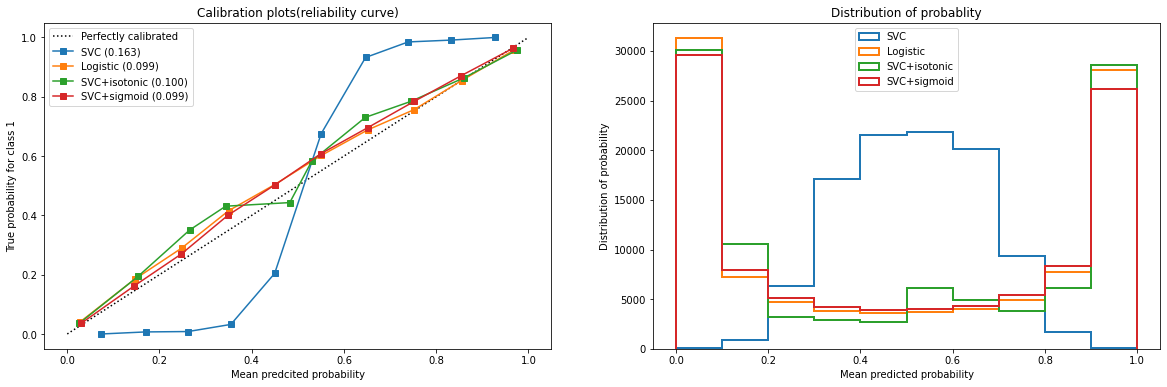

In [11]:
from sklearn.svm import SVC

name_svc = ["SVC", "Logistic", "SVC+isotonic", "SVC+sigmoid"]
svc = SVC(kernel="linear", gamma=1.0)
models_svc = [svc,
              LogisticRegression(C=1., solver='lbfgs', max_iter=3000, multi_class='auto'),
              CalibratedClassifierCV(svc, cv=2, method="isotonic"),
              CalibratedClassifierCV(svc, cv=2, method="sigmoid")]
plot_calib(models_svc, name_svc, Xtrain, Xtest, Ytrain, Ytest)

可以看出，对于SVC，sigmoid和isotonic的校准效果都非常不错，无论是从校准曲线来看还是从概率分布图来看，两种校准都让SVC的结果接近逻辑回归，其中sigmoid更加有效。来看看不同的SVC下的精确度结果（对于这一段代码，完全可以把它包括在原有的绘图函数中）：

In [13]:
name_svc = ["SVC", "SVC+isotonic", "SVC+sigmoid"]
svc = SVC(kernel="linear", gamma=1.0)
models_svc = [svc,
              CalibratedClassifierCV(svc, cv=2, method="isotonic"),
              CalibratedClassifierCV(svc, cv=2, method="sigmoid")]
for clf, name in zip(models_svc, name_svc):
    clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=Ytest.max())
    score = clf.score(Xtest, Ytest)
    print("%s:" % name)
    print("\tBrier:%1.4f" % clf_score)
    print("\tAccuracy:%1.4f" % score)

SVC:
	Brier:0.1630
	Accuracy:0.8633
SVC+isotonic:
	Brier:0.0999
	Accuracy:0.8639
SVC+sigmoid:
	Brier:0.0987
	Accuracy:0.8634


可以看到，对于SVC来说，两种校正都改善了准确率和布里尔分数。可见，概率校正对于SVC非常有效。这也说明，**概率校正对于原本的可靠性曲线是形如Sigmoid形状的曲线的算法比较有效**。

在现实中，我们可以选择调节模型的方向，我们不一定要追求最高的准确率或者追求概率拟合最好，我们可以根据自己的需求来调整模型。当然，对于概率类模型来说，由于可以调节的参数甚少，所以我们更倾向于追求概率拟合，并使用概率校准的方式来调节模型。如果你的确希望追求更高的准确率和Recall，可以考虑使用天生就非常准确的概率类模型逻辑回归，也可以考虑使用除了概率校准之外还有很多其他参数可调的支持向量机分类器。

## 2.3 多项式朴素贝叶斯以及其变化
### 2.3.1 多项式朴素贝叶斯MultinomialNB
在sklearn中，用来执行多项式朴素贝叶斯的类MultinomialNB包含如下的参数和属性：
`class sklearn.naive_bayes.MultinomialNB (alpha=1.0, fit_prior=True, class_prior=None)`
- alpha：浮点型，可选参数(默认为1.0)，拉普拉斯或利德斯通平滑的参数，如果设置为0则表示完全没有平滑选项。但是需要注意的是，平滑相当于人为给概率加上一些噪音，因此设置得越大，多项式朴素贝叶斯的精确性会越低（虽然影响不是非常大），布里尔分数也会逐渐升高
- fit_prior：布尔值, 可不填(默认为True)。是否学习先验概率$P(Y=c)$。如果设置为false，则不使用先验概率，而使用统一先验概率（uniform
prior），即认为每个标签类出现的概率是$\frac{1}{n\_classes}$。
- class_prior：形似数组的结构，结构为(n_classes,)，可不填(默认为None)。类的先验概率$P(Y=c)$。如果没有给出具体的先验概率则自动根据数据来进行计算。

通常我们在实例化多项式朴素贝叶斯的时候，会让所有的参数保持默认。先来简单建一个多项式朴素贝叶斯的例子：
1. **导入需要的模块和库**




In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss

2. **建立数据集**


In [2]:
class_1 = 500
class_2 = 500
centers = [[0.0, 0.0], [2.0, 2.0]]  # 设定两个类别的中心
clusters_std = [0.5, 0.5]  # 设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2], centers=centers, cluster_std=clusters_std, random_state=0,
                  shuffle=False)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

3. **归一化，确保输入的矩阵不带有负数**

In [18]:
# 先归一化，保证输入多项式朴素贝叶斯的特征矩阵中不带有负数
mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

4. **建立多项式朴素贝叶斯分类器及查看相关属性**

In [29]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)
# 重要属性class_log_prior_：返回每个标签类的对数先验概率log(P(Y))
# 由于概率永远是在[0,1]之间，因此对数先验概率返回的永远是负值
print(mnb.class_log_prior_)
# 可以使用np.exp(mnb.class_log_prior_)来查看真正的先验概率
print(np.exp(mnb.class_log_prior_))

# 重要属性feature_log_prob_：返回一个固定标签类别下的每个特征的对数概率log(P(Xi|y))
print(mnb.feature_log_prob_)

#重要属性class_count_：在fit时每个标签类别下包含的样本数。当fit接口中的sample_weight被设置时，该接口返回的值也会受到加权的影响
print(mnb.class_count_)

[-0.69029411 -0.69600841]
[0.50142857 0.49857143]
[[-0.76164788 -0.62903951]
 [-0.72500918 -0.6622691 ]]
[351. 349.]


5. **分类器的效果如何呢？**

In [34]:
mnb.predict(Xtest_)
mnb.predict_proba(Xtest_)  # 每个测试样本在每个标签类别上的概率
mnb.score(Xtest_, Ytest)  # 0.5433
brier_score_loss(Ytest, mnb.predict_proba(Xtest_)[:, 1], pos_label=1)  # 0.249778

0.24977828412546035

6. **效果不太理想，思考一下多项式贝叶斯的性质，我们能够做点什么呢？**

In [35]:
# 来试试看把Xtrain转换成分类型数据
# 注意Xtrain是不用经过归一化的，因为做哑变量之后自然所有的数据不会有负数
from sklearn.preprocessing import KBinsDiscretizer  # 对连续型变量进行分箱

kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)  # 一个特征分10箱，进行哑变量处理
Xtrain_ = kbs.transform(Xtrain)  # Xtrain_:(700,20)
Xtest_ = kbs.transform(Xtest)

mnb = MultinomialNB().fit(Xtrain_, Ytrain)
print(mnb.score(Xtest_, Ytest), brier_score_loss(Ytest, mnb.predict_proba(Xtest_)[:, 1], pos_label=1))

0.9966666666666667 0.0014593932778211862


可以看出，多项式朴素贝叶斯的基本操作和代码都非常简单。同样的数据，如果采用哑变量方式的分箱处理，多项式贝叶斯的效果会突飞猛进。作为在文本分类中大放异彩的算法，在最后的案例中有多项式贝叶斯的详细使用，并介绍文本分类的更多细节。

### 2.3.2 伯努利朴素贝叶斯BernoulliNB
伯努利贝叶斯类BernoulliN假设数据服从多元伯努利分布，并在此基础上应用朴素贝叶斯的训练和分类过程。多元伯努利分布简单来说，就是数据集中可以存在多个特征，但每个特征都是二分类的，可以以布尔变量表示，也可以表示为{0，1}或者{-1，1}等任意二分类组合。因此，这个类要求将样本转换为二分类特征向量，如果数据本身不是二分类的，那可以使用类中专门用来二值化的参数binarize来改变数据。

伯努利朴素贝叶斯与多项式朴素贝叶斯非常相似，都常用于处理文本分类数据。但由于伯努利朴素贝叶斯是处理二项分布，所以它更加在意的是“存在与否”，而不是“出现多少次”这样的次数或频率，这是伯努利贝叶斯与多项式贝叶斯的根本性不同。在文本分类的情况下，伯努利朴素贝叶斯可以使用单词出现向量（而不是单词计数向量）来训练分类器。文档较短的数据集上，伯努利朴素贝叶斯的效果会更加好。如果时间允许，建议两种模型都试试看。

来看看伯努利朴素贝叶斯类的参数：
`classsklearn.naive_bayes.BernoulliNB(alpha=1.0,binarize=0.0,fit_prior=True,class_prior=None)`
#### 截图
在sklearn中，伯努利朴素贝叶斯的实现也非常简单：


In [3]:
from sklearn.naive_bayes import BernoulliNB

# 普通来说我们应该使用二值化的类sklearn.preprocessing.Binarizer来将特征一个个二值化
# 然而这样效率过低，因此我们选择归一化之后直接设置一个阈值
mms = MinMaxScaler().fit(Xtrain)  # 归一化
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

# 不设置二值化
bnl_ = BernoulliNB().fit(Xtrain_, Ytrain)
print(bnl_.score(Xtest_, Ytest), brier_score_loss(Ytest, bnl_.predict_proba(Xtest_)[:, 1], pos_label=1))

# 设置二值化阈值为0.5
bnl = BernoulliNB(binarize=0.5).fit(Xtrain_, Ytrain)
print(bnl.score(Xtest_, Ytest), brier_score_loss(Ytest, bnl.predict_proba(Xtest_)[:, 1], pos_label=1))

0.49666666666666665 0.25000009482193225
0.9833333333333333 0.010405875827339534


和多项式贝叶斯一样，伯努利贝叶斯的结果也受到数据结构非常大的影响。因此，根据数据的模样选择贝叶斯，是贝叶斯模型选择中十分重要的一点。
### 2.3.3 探索贝叶斯：样本不均衡问题
接下来，来探讨一个分类算法永远都逃不过的核心问题：**样本不平衡**。贝叶斯由于分类效力不算太好，因此对样本不平衡极为敏感，接下来就来看一看样本不平衡如何影响了贝叶斯。
1. **导入需要的模块，建立样本不平衡的数据集**

In [10]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss as BS, recall_score, roc_auc_score as AUC
from sklearn.model_selection import train_test_split
import numpy as np

class_1 = 50000  # 多数类别1有50000个样本
class_2 = 500  # 少数类别2只有500个
centers = [[0.0, 0.0], [5.0, 5.0]]  # 设定两个类别的中心
clusters_std = [3, 1]  # 设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2], centers=centers, cluster_std=clusters_std, random_state=0,
                  shuffle=False)

2. **查看所有贝叶斯在样本不平衡数据集上的表现**


In [11]:
name = ['MultinomialNB', 'GaussianNB', 'BernoulliNB']
models = [MultinomialNB(), GaussianNB(), BernoulliNB()]

for name, clf in zip(name, models):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

    if name != "GaussianNB":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)

    clf = clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:, 1]  # 获取预测为1的概率
    score = clf.score(Xtest, Ytest)
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest, proba, pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest, y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest, proba)))

MultinomialNB
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
GaussianNB
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
BernoulliNB
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987


从结果上来看，多项式朴素贝叶斯判断出了所有的多数类样本，但放弃了全部的少数类样本，受到样本不均衡问题影响最严重。高斯比多项式在少数类的判断上更加成功一些，至少得到了43.8%的recall。伯努利贝叶斯虽然整体的准确度和布里尔分数不如多项式和高斯朴素贝叶斯和，但至少成功捕捉出了77.1%的少数类。可见，伯努利贝叶斯最能够忍受样本不均衡问题。

可是，伯努利贝叶斯只能用于处理二项分布数据，在现实中，强行将所有的数据都二值化不会永远得到好结果，在我们有多个特征的时候，我们更需要一个个去判断究竟二值化的阈值该取多少才能够让算法的效果优秀。这样做无疑是非常低效的。那如果我们的目标是捕捉少数类，我们应该怎么办呢？高斯朴素贝叶斯的效果虽然比多项式好，但是也没有好到可以用来帮助我们捕捉少数类的程度——43.8%，还不如抛硬币的结果。因此，孜孜不倦的统计学家们改进了朴素贝叶斯算法，修正了包括无法处理样本不平衡在内的传统朴素贝叶斯的众多缺点，得到了新兴贝叶斯算法：**补集朴素贝叶斯**。

### 2.3.4 改进多项式朴素贝叶斯：补集朴素贝叶斯ComplementNB
补集朴素贝叶斯（complementnaiveBayes，CNB）算法是标准多项式朴素贝叶斯算法的改进。CNB的发明小组创造出CNB的初衷是为了解决贝叶斯中的“朴素”假设带来的各种问题，他们希望能够创造出数学方法以逃避朴素贝叶斯中的朴素假设，让算法能够不去关心所有特征之间是否是条件独立的。以此为基础，他们创造出了能够解决样本不平衡问题，并且能够一定程度上忽略朴素假设的补集朴素贝叶斯。在实验中，CNB的参数估计已经被证明比普通多项式朴素贝叶斯更稳定，并且它特别适合于样本不平衡的数据集。有时候，CNB在文本分类任务上的表现有时能够优于多项式朴素贝叶斯，因此现在补集朴素贝叶斯也开始逐渐流行。

关于补集朴素贝叶斯具体是如何逃避了朴素假设，或者如何让样本不均衡问题得到了改善，背后有深刻的数学原理和复杂的数学证明过程，具体可以参阅这篇论文：
- Rennie, J. D., Shih, L., Teevan, J., & Karger, D. R. (2003). [Tackling the poor assumptions of naive bayes text
classifiers](https://people.csail.mit.edu/jrennie/papers/icml03-nb.pdf). In ICML (Vol. 3, pp. 616-623).


在sklearn中，补集朴素贝叶斯由类ComplementNB完成，它包含的参数和多项式贝叶斯也非常相似：
`class sklearn.naive_bayes.ComplementNB (alpha=1.0, fit_prior=True, class_prior=None, norm=False)`
#### 截图
那来看看，补集朴素贝叶斯在不平衡样本上的表现，同时计算一下每种贝叶斯的计算速度：

In [12]:
from sklearn.naive_bayes import ComplementNB
from time import time
import datetime

name = ["Multinomial", "Gaussian", "Bernoulli", "Complement"]
models = [MultinomialNB(), GaussianNB(), BernoulliNB(), ComplementNB()]

for name, clf in zip(name, models):
    start = time()
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)

    clf = clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:, 1]
    score = clf.score(Xtest, Ytest)
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest, proba, pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest, y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest, proba)))
    print(datetime.datetime.fromtimestamp(time() - start).strftime("%M:%S:%f"))

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
00:00:031265
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
00:00:031245
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987
00:00:036370
Complement
	Brier:0.038
	Accuracy:0.953
	Recall:0.987
	AUC:0.991
00:00:031252


可以发现，补集朴素贝叶斯牺牲了部分整体的精确度和布里尔指数，但是得到了十分高的召回率Recall，捕捉出了98.7%的少数类，并且在此基础上维持了和原本的多项式朴素贝叶斯一致的AUC分数。和其他的贝叶斯算法比起来，补集朴素贝叶斯的运行速度也十分优秀。**如果我们的目标是捕捉少数类，那我们毫无疑问会希望选择补集朴素贝叶斯作为我们的算法**。

# 3 案例：贝叶斯分类器做文本分类
文本分类是现代机器学习应用中的一大模块，更是自然语言处理的基础之一。我们可以通过将文字数据处理成数字数据，然后使用贝叶斯来帮助我们判断一段话，或者一篇文章中的主题分类，感情倾向，甚至文章体裁。现在，绝大多数社交媒体数据的自动化采集，都是依靠首先将文本编码成数字，然后按分类结果采集需要的信息。虽然现在自然语言处理领域大部分由深度学习所控制，贝叶斯分类器依然是文本分类中的一颗明珠。

## 3.1 文本编码技术简介
### 3.1.1 单词计数向量
在开始分类之前，必须先将文本编码成数字。一种常用的方法是单词计数向量。在这种技术中，一个样本可以包含一段话或一篇文章，这个样本中如果出现了10个单词，就会有10个特征(n=10)，每个特征代表一个单词，特征的取值表示这个单词在这个样本中总共出现了几次，**是一个离散的，代表次数的，正整数**。

在sklearn当中，单词计数向量计数可以通过feature_extraction.text模块中的CountVectorizer类实现，来看一个简单的例子：

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

sample = ["Machine learning is fascinating, it is wonderful",
          "Machine learning is a sensational technology",
          "Elsa is a popular character"]

vec = CountVectorizer()
X = vec.fit_transform(sample)

# 使用接口get_feature_names()调用每个列的名称
# 注意稀疏矩阵是无法输入pandas的
CVresult = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
CVresult

,character,elsa,fascinating,is,it,learning,machine,popular,sensational,technology,wonderful
0,0,0,1,2,1,1,1,0,0,0,1
1,0,0,0,1,0,1,1,0,1,1,0
2,1,1,0,1,0,0,0,1,0,0,0


#### 截图
### 3.1.2 TF-IDF
TF-IDF全称term frequency-inverse document frequency，词频逆文档频率，是通过单词在文档中出现的频率来衡量其权重，也就是说，**IDF的大小与一个词的常见程度成反比，这个词越常见，编码后为它设置的权重会倾向于越小，以此来压制频繁出现的一些无意义的词**。更多内容可参考[特征提取方法：one-hot和TF-IDF](https://www.cnblogs.com/lianyingteng/p/7755545.html)
在sklearn当中，我们使用feature_extraction.text中类TfidfVectorizer来执行这种编码。

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

vec = TFIDF()
X = vec.fit_transform(sample)
TFIDFresult = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
TFIDFresult

,character,elsa,fascinating,is,it,learning,machine,popular,sensational,technology,wonderful
0,0.000000,0.000000,0.424396,0.501310,0.424396,0.322764,0.322764,0.000000,0.000000,0.000000,0.424396
1,0.000000,0.000000,0.000000,0.315444,0.000000,0.406192,0.406192,0.000000,0.534093,0.534093,0.000000
2,0.546454,0.546454,0.000000,0.322745,0.000000,0.000000,0.000000,0.546454,0.000000,0.000000,0.000000


In [5]:
# 使用TF-IDF编码之后，出现得多的单词的权重theta被降低了么？
print(CVresult.sum(axis=0) / CVresult.sum(axis=0).sum())
print('-' * 50)
print(TFIDFresult.sum(axis=0) / TFIDFresult.sum(axis=0).sum())
# 将原本出现次数比较多的词压缩我们的权重
# 将原本出现次数比较少的词增加我们的权重

character      0.0625
elsa           0.0625
fascinating    0.0625
is             0.2500
it             0.0625
learning       0.1250
machine        0.1250
popular        0.0625
sensational    0.0625
technology     0.0625
wonderful      0.0625
dtype: float64
--------------------------------------------------
character      0.083071
elsa           0.083071
fascinating    0.064516
is             0.173225
it             0.064516
learning       0.110815
machine        0.110815
popular        0.083071
sensational    0.081192
technology     0.081192
wonderful      0.064516
dtype: float64


在之后的例子中，我们都会使用TF-IDF的编码方式。

## 3.2 探索文本数据
在现实中，文本数据的处理是十分耗时耗力的，尤其是不规则的长文本的处理方式，绝对不是一两句话能够说明白的，因此在这里我们将使用的数据集是sklearn中自带的文本数据集fetch_20newsgroup。这个数据集是20个网络新闻组的语料库，其中包含约2万篇新闻，全部以英文显示，如果希望使用中文则处理过程会更加困难，会需要自己加载中文的语料库。在这个例子中，主要目的是为展示贝叶斯的用法和效果，因此就使用英文的语料库。

In [6]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

# 通常我们使用data来查看data里面到底包含了什么内容，但由于fetch_20newsgourps这个类加载出的数据巨大，数据结构中混杂很多文字，因此很难去看清

# 不同类型的新闻
print(data.target_names)

# 其实fetch_20newsgroups也是一个类，既然是类，应该就有可以调用的参数
# 面对简单数据集，往往在实例化的过程中什么都不写，但是现在data中数据量太多，不方便探索
# 因此我们需要来看看我们的类fetch_20newsgroups都有什么样的参数可以帮助我们

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


`sklearn.datasets.fetch_20newsgroups (data_home=None, subset=’train’, categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True)`
在这之中，我们来认识几个比较重要的参数：
### 截图
现在就可以直接通过参数来提取我们希望得到的数据集了。

In [17]:
import numpy as np
import pandas as pd

catagories = ["sci.space", "rec.sport.hockey", "talk.politics.guns", "talk.politics.mideast"]
train = fetch_20newsgroups(subset='train', categories=catagories)
test = fetch_20newsgroups(subset='test', categories=catagories)

# train 里面依然是类字典结构，我们可以通过使用键的方式来提取内容
print(train.target_names)

# 查看总共有多少篇文章
print(len(train.data))

# 查看第一篇文章的内容
# print(train.data[0])

# 查看标签
print(train.target, len(train.target))

# 是否存在样本不均衡问题
for i in range(4):
    print(i, (train.target == i).sum() / len(train.target))
# 可以看出没有样本不均衡问题

['rec.sport.hockey', 'sci.space', 'talk.politics.guns', 'talk.politics.mideast']
2303
[0 1 3 ... 1 0 1] 2303
0 0.26052974381241856
1 0.25749023013460703
2 0.23708206686930092
3 0.24489795918367346


## 3.3 使用TF-IDF将文本数据编码


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

Xtrain = train.data
Xtest = test.data
Ytrain = train.target
Ytest = test.target

tfidf = TFIDF().fit(Xtrain)
Xtrain_ = tfidf.transform(Xtrain)
Xtest_ = tfidf.transform(Xtest)

tosee = pd.DataFrame(Xtrain_.toarray(), columns=tfidf.get_feature_names_out())
tosee.head()
# tosee.shape (2303, 40725)

,00,000,0000,00000,000000,000021,000062david42,000152,000246,000256,...,zwrm,zx,zx6wre,zxp,zxqi,zy,zyg,zz,zz_g9q3,zzzzzz
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.058046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.4 在贝叶斯上分别建模，查看结果


In [22]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import log_loss

name = ['MultinomialNB', 'ComplementNB', 'BernoulliNB']

# 注意高斯贝叶斯不接受稀疏矩阵，故这里不用
models = [MultinomialNB(), ComplementNB(), BernoulliNB()]

for name, clf in zip(name, models):
    clf.fit(Xtrain_, Ytrain)
    y_pred = clf.predict_proba(Xtest_)
    proba = clf.predict_proba(Xtest_)
    log_loss_score = log_loss(Ytest, proba)
    score = clf.score(Xtest_, Ytest)
    print(name)
    print("\tlog_loss:{:.3f}".format(log_loss_score))
    print("\tAccuracy:{:.3f}".format(score))

MultinomialNB
	log_loss:0.268
	Accuracy:0.975
ComplementNB
	log_loss:0.331
	Accuracy:0.986
BernoulliNB
	log_loss:2.083
	Accuracy:0.902


我们可以使用概率校准来试试看能否让模型进一步突破：

In [23]:
from sklearn.calibration import CalibratedClassifierCV

name = ["Multinomial"
    , "Multinomial + Isotonic"
    , "Multinomial + Sigmoid"
    , "Complement"
    , "Complement + Isotonic"
    , "Complement + Sigmoid"
    , "Bernoulli"
    , "Bernoulli + Isotonic"
    , "Bernoulli + Sigmoid"]

models = [MultinomialNB()
    , CalibratedClassifierCV(MultinomialNB(), cv=2, method='isotonic')
    , CalibratedClassifierCV(MultinomialNB(), cv=2, method='sigmoid')
    , ComplementNB()
    , CalibratedClassifierCV(ComplementNB(), cv=2, method='isotonic')
    , CalibratedClassifierCV(ComplementNB(), cv=2, method='sigmoid')
    , BernoulliNB()
    , CalibratedClassifierCV(BernoulliNB(), cv=2, method='isotonic')
    , CalibratedClassifierCV(BernoulliNB(), cv=2, method='sigmoid')
          ]
for name, clf in zip(name, models):
    clf.fit(Xtrain_, Ytrain)
    y_pred = clf.predict_proba(Xtest_)
    proba = clf.predict_proba(Xtest_)
    log_loss_score = log_loss(Ytest, proba)
    score = clf.score(Xtest_, Ytest)
    print(name)
    print("\tlog_loss:{:.3f}".format(log_loss_score))
    print("\tAccuracy:{:.3f}".format(score))

Multinomial
	log_loss:0.268
	Accuracy:0.975
Multinomial + Isotonic
	log_loss:0.140
	Accuracy:0.973
Multinomial + Sigmoid
	log_loss:0.091
	Accuracy:0.973
Complement
	log_loss:0.331
	Accuracy:0.986
Complement + Isotonic
	log_loss:0.071
	Accuracy:0.985
Complement + Sigmoid
	log_loss:0.071
	Accuracy:0.986
Bernoulli
	log_loss:2.083
	Accuracy:0.902
Bernoulli + Isotonic
	log_loss:0.229
	Accuracy:0.937
Bernoulli + Sigmoid
	log_loss:0.443
	Accuracy:0.879


可以观察到，多项式分布下无论如何调整，算法的效果都不如补集朴素贝叶斯来得好。因此我们在分类的时候，应该选择补集朴素贝叶斯。对于补集朴素贝叶斯来说，使用Sigmoid进行概率校准的模型综合最优秀：准确率最高，对数损失在0.1以下，可以说是非常理想的模型了。

> 对于机器学习而言，朴素贝叶斯也许不是最常用的分类算法，但作为概率预测算法中唯一一个真正依赖概率来进行计算，并且简单快捷的算法，朴素贝叶斯还是常常被人们提起。并且，朴素贝叶斯在文本分类上的效果的确非常优秀。由此可见，只要我们能够提供足够的数据，合理利用高维数据进行训练，朴素贝叶斯就可以为我们提供意想不到的效果